In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from collections import defaultdict, Counter
from IPython.display import display

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import tree, linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import r2_score, accuracy_score, fbeta_score, roc_auc_score
from sklearn.model_selection import cross_val_score
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
from sklearn.metrics import classification_report


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler

#Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn import grid_search
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.cross_validation import train_test_split, ShuffleSplit

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from textblob import TextBlob
from textblob import Word

pd.options.display.max_colwidth = 500
#from nltk.autocorrect import spell

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
#Read the dataset, 
df_all = pd.read_csv('/Users/dona/Documents/DonaRay/SpringBoard/git/SpringBoard/Capstone/data/Clothing.csv')

# Drop rows with missing data
df_nonmissing = df_all[~df_all['Review Text'].isnull()]

#df_sub = df_nonmissing[['Rating', 'Department Name', 'Division Name', 'Class Name']]

df_nonmissing.columns = ['Index', 'ClothingID', 'Age', 'Title', 'ReviewText', 'Rating', 'RecommendedIND', 
                         'PositiveFeedbackCount','DivisionName', 'DepartmentName', 'ClassName']

In [4]:
def Print_Stats(df, num):
    #Prints basic summary statistics of a pandas dataframe    

    print(df.head(num))
    print(df.shape)
    print(df.info())
    print(df.columns)
    print(df.describe())
    
def Print_Frequency(df, bins = []):
    #Prints frequency distribution
    
    col_list = list(df.columns.values)
    
    if bins == []:
        for col in col_list:
            print(df[col].value_counts().sort_index())
    else:
        for col in col_list:
            print(pd.cut(df[col],bins).value_counts().sort_index())

In [5]:
Print_Stats(df_nonmissing, 5)
#Print_Frequency(df_sub)

   Index  ClothingID  Age                    Title  \
0      0         767   33                      NaN   
1      1        1080   34                      NaN   
2      2        1077   60  Some major design flaws   
3      3        1049   50         My favorite buy!   
4      4         847   47         Flattering shirt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ReviewText  \
0                                                                                                                                                                        

In [5]:
Print_Frequency(df_nonmissing[['PositiveFeedbackCount']])

0      10331
1       4043
2       2193
3       1433
4        922
5        673
6        525
7        374
8        319
9        261
10       225
11       178
12       146
13       102
14       121
15        94
16        74
17        81
18        62
19        54
20        40
21        30
22        29
23        31
24        21
25        25
26        23
27        20
28        24
29        15
       ...  
52         1
53         2
54         1
55         2
56         1
57         3
58         2
59         1
61         1
64         1
65         4
66         1
68         1
69         1
71         1
77         1
78         1
81         4
82         1
84         1
87         1
89         1
93         1
94         1
95         1
98         1
99         1
108        1
117        1
122        1
Name: PositiveFeedbackCount, Length: 82, dtype: int64


1      821
2     1549
3     2823
4     4908
5    12540
Name: Rating, dtype: int64


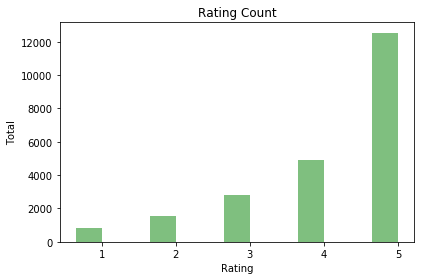

In [54]:
# Bar Chart of Ratings
x = df_nonmissing['Rating'].value_counts().sort_index()

print(x)

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35


plt.bar(index, x, bar_width, label='Rating', alpha =0.5, align='center', color='green')

plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.title('Rating Count')
plt.xlabel('Rating')
plt.ylabel('Total')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


Rating
1    3.548112
2    3.360232
3    3.198725
4    2.488386
5    2.408134
Name: PositiveFeedbackCount, dtype: float64
Rating
1     2913
2     5205
3     9030
4    12213
5    30198
Name: PositiveFeedbackCount, dtype: int64


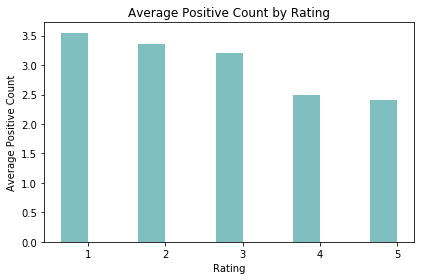

In [73]:
# Average Positive Count by Rating
grp = df_nonmissing.groupby('Rating')
means = grp.PositiveFeedbackCount.mean()
total = grp.PositiveFeedbackCount.sum()

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35

print(means)
print(total)

plt.bar(index, means, bar_width, label='Rating', alpha =0.5, align='center', color='Teal')

plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.title('Average Positive Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Positive Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


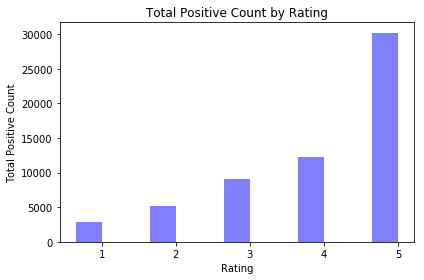

In [20]:
# Total Positive Count by Rating
grp = df_nonmissing.groupby('Rating')
total = grp.PositiveFeedbackCount.sum()

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35


plt.bar(index, total, bar_width, label='Rating', alpha =0.5, align='center', color='blue')

plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.title('Total Positive Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Positive Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


In [9]:
x = df_nonmissing['DivisionName'].value_counts()
print(x)
print('')

x = df_nonmissing['DepartmentName'].value_counts()
print(x)
print('')

x = df_nonmissing['ClassName'].value_counts()
print(x)

General           13365
General Petite     7837
Initmates          1426
Name: DivisionName, dtype: int64

Tops        10048
Dresses      6145
Bottoms      3662
Intimate     1653
Jackets      1002
Trend         118
Name: DepartmentName, dtype: int64

Dresses           6145
Knits             4626
Blouses           2983
Sweaters          1380
Pants             1350
Jeans             1104
Fine gauge        1059
Skirts             903
Jackets            683
Lounge             669
Swim               332
Outerwear          319
Shorts             304
Sleep              214
Legwear            158
Intimates          147
Layering           132
Trend              118
Casual bottoms       1
Chemises             1
Name: ClassName, dtype: int64


DivisionName    General  General Petite  Initmates
Rating                                            
1              3.583988        3.713156   3.576438
2              7.108118        6.686232   5.259467
3             13.019080       11.854026  10.799439
4             21.773288       21.717494  20.757363
5             54.515526       56.029093  59.607293


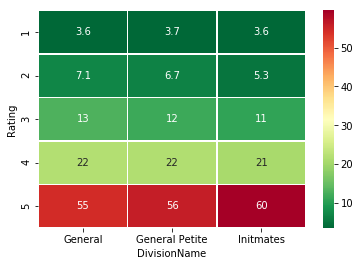

In [16]:
Rating_Division_table = pd.crosstab(df_nonmissing.Rating, df_nonmissing.DivisionName).apply(lambda r: r/r.sum() * 100, axis=0)
Dept = pd.crosstab(df_nonmissing.Rating, df_nonmissing.DepartmentName)
print(Rating_Division_table)

sns.heatmap(Rating_Division_table, cmap='RdYlGn_r', linewidths=0.5, annot=True)


plt.show()


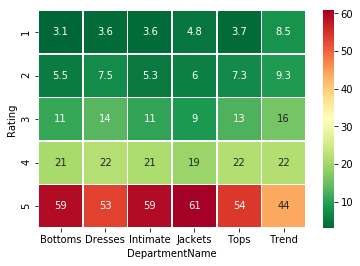

In [18]:
Rating_Dept_table = pd.crosstab(df_nonmissing.Rating, df_nonmissing.DepartmentName).apply(lambda r: r/r.sum() *100, axis=0)

sns.heatmap(Rating_Dept_table, cmap='RdYlGn_r', linewidths=0.5, annot=True)

plt.show()


DivisionName
General           2.672428
General Petite    2.695547
Initmates         1.900421
Name: PositiveFeedbackCount, dtype: float64


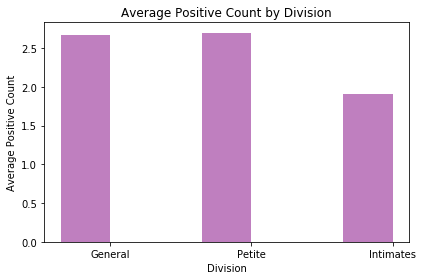

In [12]:
# Number of Positive Counts by Division

grp = df_nonmissing.groupby('DivisionName')
means = grp.PositiveFeedbackCount.mean()
total = grp.PositiveFeedbackCount.sum()

print(means)
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.35


plt.bar(index, means, bar_width, label='Rating', alpha =0.5, align='center', color='Purple')

plt.xticks(index + bar_width/2, ('General', 'Petite', 'Intimates'))
plt.title('Average Positive Count by Division')
plt.xlabel('Division')
plt.ylabel('Average Positive Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


DepartmentName
Bottoms      8043
Dresses     19510
Intimate     3275
Jackets      2916
Tops        25407
Trend         401
Name: PositiveFeedbackCount, dtype: int64


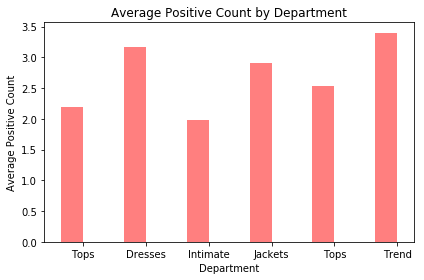

In [13]:
# Number of Positive Counts by Department Name

grp = df_nonmissing.groupby('DepartmentName')
means = grp.PositiveFeedbackCount.mean()
total = grp.PositiveFeedbackCount.sum()

n_groups = 6
index = np.arange(n_groups)
bar_width = 0.35

print(total)

plt.bar(index, means, bar_width, label='Rating', alpha =0.5, align='center', color='Red')

plt.xticks(index + bar_width/2, ('Tops', 'Dresses', 'Intimate', 'Jackets', 'Tops', 'Trend'))
plt.title('Average Positive Count by Department')
plt.xlabel('Department')
plt.ylabel('Average Positive Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


In [6]:
# Cleaning Text Data
#func = lambda x: x['ReviewText'].split()

#df_nonmissing['Split_words'] = df_nonmissing.apply(func, axis=1)
#print(words[:100])

#print(df_nonmissing.head(10))

df = df_nonmissing

df['word_count'] = df['ReviewText'].apply(lambda x: len(str(x).split(" ")) )

df['char_count'] = df['ReviewText'].str.len()

print(df[['ReviewText', 'word_count', 'char_count']].head())

print(df['word_count'].sum())
print(df['word_count'].mean())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ReviewText  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                Absolutely wonderful - silky and sexy and com

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [7]:
# Stopwords
import nltk
#nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')

#stop = ['and']

df['stopwords'] = df['ReviewText'].apply(lambda x: len([x for x in x.split() if x in stop]))

df['numerics'] = df['ReviewText'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

df['upper'] = df['ReviewText'].apply(lambda x: len([x for x in x.split() if x.isupper()]))


#df['Correct'] = df['ReviewText'].apply(lambda x: str(TextBlob(x).correct()))

#df['word_split'] = df['ReviewText'].apply(lambda x: str(x).split(" ") )

word_freq = pd.Series(' '.join(df['ReviewText']).split()).value_counts()

#rare_words = pd.Series(' '.join(df['ReviewText']).split()).value_counts()[-500:]

values_list = dict(word_freq)
values_list = Counter(values_list)

for k, v in values_list.most_common(10):
    print(k, v)
    
# Print the 10 most common words
count_once = 0
for k, v in values_list.items():
    if v == 1:
        #print(k, v)
        count_once += 1

print('Total number of words that appear once: ', count_once)      

print('Total word count')
print(df['ReviewText'].apply(lambda x: len(str(x).split(" ")) ).sum())

print('Total number of unique words')

uniqueWords = list(set(" ".join(df['ReviewText']).lower().split(" ")))
count = len(uniqueWords)

print(count)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

the 74698
i 49630
and 48505
a 42632
it 37302
is 30322
to 24314
this 20726
in 20211
but 16104
Total number of words that appear once:  22052
Total word count
1363325
Total number of unique words
40071


Rating
1     48171
2     96127
3    181316
4    310716
5    726995
Name: word_count, dtype: int64
Rating
1    58.673569
2    62.057456
3    64.228126
4    63.308068
5    57.974083
Name: word_count, dtype: float64


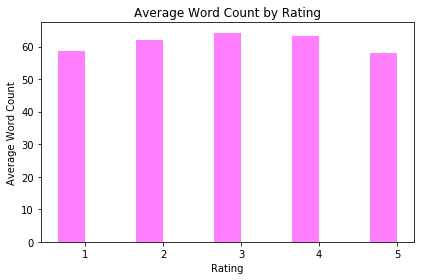

In [27]:
# Word Count by Rating

grp = df.groupby('Rating')
means = grp.word_count.mean()
total = grp.word_count.sum()

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35

print(total)
print(means)

plt.bar(index, means, bar_width, label='Rating', alpha =0.5, align='center', color='Magenta')

plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.title('Average Word Count by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Word Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')


Rating
1     23393
2     47005
3     89150
4    151140
5    345898
Name: stopwords, dtype: int64


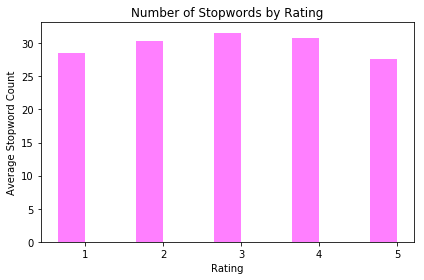

In [195]:
# Number of  stopwords by Rating

grp = df.groupby('Rating')
means = grp.stopwords.mean()
total = grp.stopwords.sum()

n_groups = 5
index = np.arange(n_groups)
bar_width = 0.35

print(total)

plt.bar(index, means, bar_width, label='Rating', alpha =0.5, align='center', color='Magenta')

plt.xticks(index + bar_width/2, ('1', '2', '3', '4', '5'))
plt.title('Number of Stopwords by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Stopword Count')
plt.tight_layout()

#fig_rating = plt.gcf()
plt.show()

#fig_rating.savefig('Rating.jpeg', bbox_inches='tight')

In [8]:
# Convert to lower case
df['ReviewText'] = df['ReviewText'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove Punctuation
df['ReviewText'] = df['ReviewText'].str.replace('[^\w\s]','')

# Remove Stopwords
df['ReviewText'] = df['ReviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


# Remove numerics
df['ReviewText'] = df['ReviewText'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

# Change to root word
df['ReviewText'] = df['ReviewText'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


word_freq = pd.Series(' '.join(df['ReviewText']).split()).value_counts()

values_list = dict(word_freq)
values_list = Counter(values_list)

for k, v in values_list.most_common(10):
    print(k, v)
    
# Print the 10 most common words
count_once = 0
rare_words = []
for k, v in values_list.items():
    if v == 1:
        #print(k, v)
        rare_words.append(k)
        count_once += 1
        
#rare_words = word_freq[-10:]
print(rare_words[0:10])

# Remove words that appear once: rare words, missplet words
df['ReviewText'] = df['ReviewText'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

print('Total number of words that appear once: ', count_once)      

print('Total word count')
print(df['ReviewText'].apply(lambda x: len(str(x).split(" ")) ).sum())


print('Total number of unique words')

uniqueWords = list(set(" ".join(df['ReviewText']).lower().split(" ")))
count = len(uniqueWords)

print(count)



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

dress 11319
fit 10091
size 9349
love 8968
top 8256
like 7018
color 6903
look 6873
wear 6512
great

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


 6076
['chestcollar', 'mymy', 'fancied', 'bleeding', 'beac', 'stretchyness', 'alined', 'homage', 'sizeromantic', 'sunprotection']
Total number of words that appear once:  9523
Total word count
642694
Total number of unique words
7960


Modelling

In [10]:
# Define a function to fit and print results

def Model(X_train, y_train, X_test, y_test, classifier):
    reg = classifier.fit(X_train, y_train)
    
    # Compute metrics
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    score_1 = reg.score(X_test, y_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    roc_score = roc_auc_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, reg.predict(X_train))
    
    print('Accuracy score on training data: {:.4f}'.format(accuracy_train))
    print('Accuracy score on testing data: {:.4f}'.format(accuracy_test))
    print('')    
    
    
    print('Roc score: {:.4f}'.format(roc_score))
    print('')

    # Generate the confusion matrix and classification report
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print('')
    
    print('Classification Report')
    print(classification_report(y_test, y_pred))

    return reg

In [72]:
# Define a pipeline combining a text feature extractor with a simple classifier
# Count Vectorizer and Multinomial Naive Bayes Classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clfNB', MultinomialNB())
])


# Define Parameter Space
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df' : (0, 0.01, 0.02, 0.05),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clfNB__alpha': (0.001, 0.01, .1, 1, 5, 10),
}


data = [4, 5]
y = [int(n in set(data)) for n in df['Rating']]

# Make an fbeta_score scoring object
#scorer = make_scorer(accuracy_score) 

# Split the data into train test data
X_train, X_test, y_train, y_test = train_test_split(df['ReviewText'], y, test_size=0.2, random_state = 99)

# find the best parameters for both the feature extraction and the classifier
clf_countVect = GridSearchCV(pipeline, parameters)


print('Results using CountVectorizer\n------')
reg_countVect = Model(X_train, y_train, X_test, y_test, clf_countVect)


Results using CountVectorizer
------
Accuracy score on training data: 0.9927
Accuracy score on testing data: 0.8772

Roc score: 0.8025

Confusion Matrix
[[ 682  342]
 [ 214 3291]]

Classification Report
             precision    recall  f1-score   support

          0       0.76      0.67      0.71      1024
          1       0.91      0.94      0.92      3505

avg / total       0.87      0.88      0.87      4529



In [74]:
# Count Vectorizer
print('Count Vectorizer\n-----')
print(reg_countVect.best_params_)


Count Vectorizer
-----
{'clfNB__alpha': 0.1, 'vect__max_df': 0.5, 'vect__min_df': 0, 'vect__ngram_range': (1, 2)}


In [11]:
# Define a pipeline combining a text feature extractor with a simple classifier
# Tfidf vectorizer and Multinomial Naive Bayes Classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clfNB', MultinomialNB())
])


# Define Parameter Space
parameters = {
    'tfidf__use_idf': (True, False),
    'tfidf__max_df': (0.5, 0.75, 1.0),
    'tfidf__min_df': (0, 0.01, 0.02, 0.05),
    'tfidf__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    #'tfidf__norm': ('l1', 'l2'),
    'clfNB__alpha': (0.001, 0.01, .1, 1, 5, 10),    
}


data = [4, 5]
y = [int(n in set(data)) for n in df['Rating']]

# Split the data into train test data
X_train, X_test, y_train, y_test = train_test_split(df['ReviewText'], y, test_size=0.2, random_state = 99)

# find the best parameters for both the feature extraction and the classifier
clf_tfidf = GridSearchCV(pipeline, parameters)


print('Results using Tfidf Vectorizer\n------')
reg_tfidf = Model(X_train, y_train, X_test, y_test, clf_tfidf)


Results using Tfidf Vectorizer
------
Accuracy score on training data: 0.9970
Accuracy score on testing data: 0.8651

Roc score: 0.7307

Confusion Matrix
[[ 497  527]
 [  84 3421]]

Classification Report
             precision    recall  f1-score   support

          0       0.86      0.49      0.62      1024
          1       0.87      0.98      0.92      3505

avg / total       0.86      0.87      0.85      4529



In [13]:
# TfIDF Vectorizer
print('Tfidf Vectorizer\n-----')
print(reg_tfidf.best_params_)


Tfidf Vectorizer
-----
{'clfNB__alpha': 0.01, 'tfidf__max_df': 0.5, 'tfidf__min_df': 0, 'tfidf__ngram_range': (1, 2), 'tfidf__use_idf': False}


In [15]:
# Define a pipeline combining a text feature extractor with a Random Forest classifier
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('clfRF', RandomForestClassifier())
])


# Define Parameter Space
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__min_df' : (0, 0.01, 0.02, 0.05),
    #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'clfRF__n_estimators': (5, 10, 15, 20, 25, 50),
}


data = [4, 5]
y = [int(n in set(data)) for n in df['Rating']]

# Make an fbeta_score scoring object
#scorer = make_scorer(accuracy_score) 

# Split the data into train test data
X_train, X_test, y_train, y_test = train_test_split(df['ReviewText'], y, test_size=0.2, random_state = 99)

# find the best parameters for both the feature extraction and the classifier
clf_RF_countVect = GridSearchCV(pipeline, parameters)


print('Results using CountVectorizer\n------')
reg_RF_countVect = Model(X_train, y_train, X_test, y_test, clf_RF_countVect)


Results using CountVectorizer
------
Accuracy score on training data: 0.9999
Accuracy score on testing data: 0.8485

Roc score: 0.7207

Confusion Matrix
[[ 499  525]
 [ 161 3344]]

Classification Report
             precision    recall  f1-score   support

          0       0.76      0.49      0.59      1024
          1       0.86      0.95      0.91      3505

avg / total       0.84      0.85      0.84      4529



In [17]:
# Random Forest Classifer with Count Vectorizer
print('Random Forest with Count Vectorizer\n-----')
print(reg_RF_countVect.best_params_)

Random Forest with Count Vectorizer
-----
{'clfRF__n_estimators': 50, 'vect__max_df': 0.5, 'vect__min_df': 0.01, 'vect__ngram_range': (1, 2)}


In [14]:
# Mulitclass Classification

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ReviewText'])
y_raw = df['Rating']

# Split the data into train test data
X_train, X_test, y_train, y_test = train_test_split(X, y_raw, test_size=0.2, random_state = 99)

estimator = MultinomialNB()
clf_m = OneVsRestClassifier(estimator).fit(X_train, y_train)

# call pipeline.predict() on X_test data to make a set of test predictions
y_pred_m = clf_m.predict(X_test)

# test predictions using sklearn.classification_report()
report = classification_report(y_test, y_pred_m)

# and print the report
print(report)

accuracy_train = accuracy_score(y_train, clf_m.predict(X_train))
accuracy_test = accuracy_score(y_test, y_pred_m)

print('Accuracy score on training data: {:.4f}'.format(accuracy_train))
print('Accuracy score on testing data: {:.4f}'.format(accuracy_test))


             precision    recall  f1-score   support

          1       0.48      0.19      0.27       165
          2       0.37      0.15      0.21       330
          3       0.35      0.47      0.40       529
          4       0.42      0.31      0.36       972
          5       0.77      0.88      0.82      2533

avg / total       0.60      0.63      0.61      4529

Accuracy score on training data: 0.7417
Accuracy score on testing data: 0.6297


In [153]:
print(type(y_pred_m))
print(y_pred_m[0:5])
print(y_test[0:5])

<class 'numpy.ndarray'>
[3 5 3 3 5]
4103     2
4872     4
13534    2
22687    3
6040     5
Name: Rating, dtype: int64
